<a href="https://colab.research.google.com/github/faranak5171/Computer-Vision-Projects/blob/main/opencv_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(1367, 1025, 3)
width: 1025, height: 1367


Text(0.5, 1.0, 'HSV image')

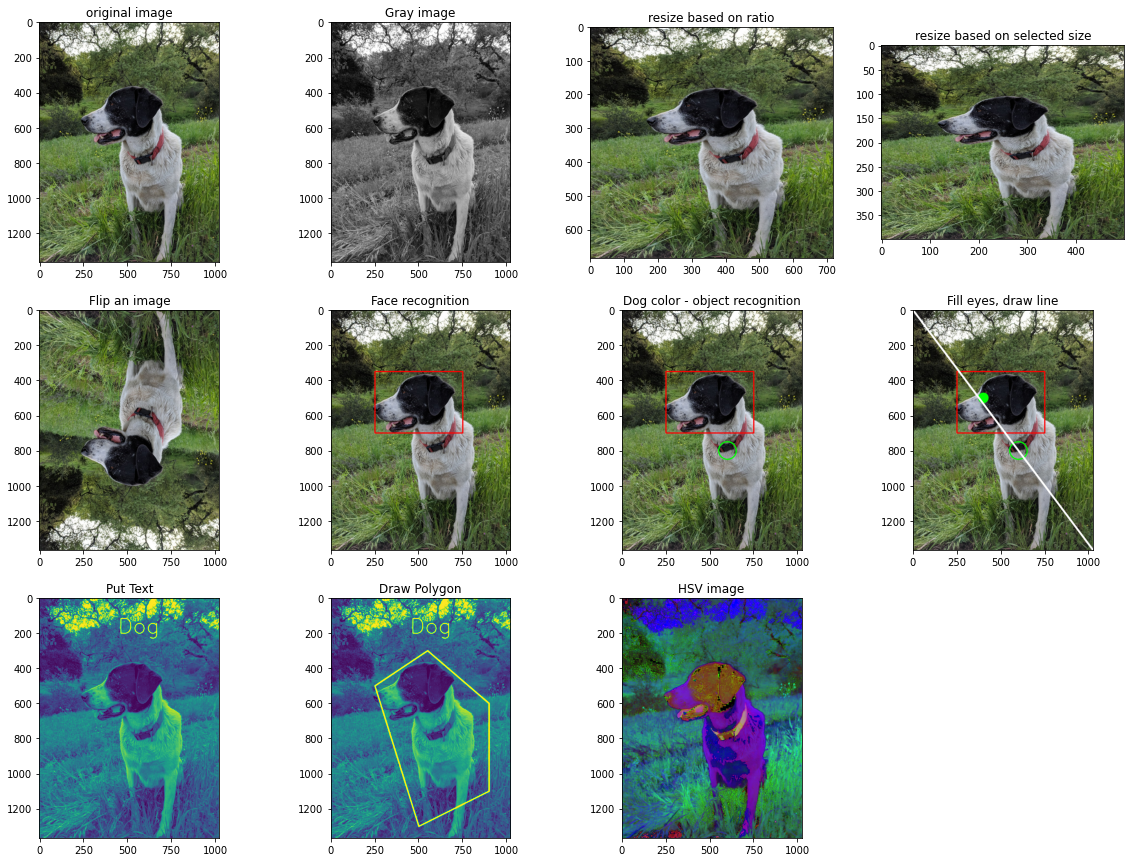

In [4]:
pic = cv2.imread('sammy.jpg')
fix_pic = cv2.cvtColor(pic,cv2.COLOR_BGR2RGB)

print(fix_pic.shape)
width = fix_pic.shape[1]
height = fix_pic.shape[0]
print(f"width: {width}, height: {height}")

fig = plt.figure(figsize=(20,15))
rows = 3
cols = 4
ax = fig.add_subplot(rows,cols,1)
ax.imshow(fix_pic)
ax.set_title('original image')

#Show image in grayscale
gray_pic = cv2.imread('sammy.jpg', cv2.IMREAD_GRAYSCALE)
ax = fig.add_subplot(rows,cols,2)
ax.imshow(gray_pic, cmap='gray')
ax.set_title('Gray image')

#resize based on ratio
w_ratio = 0.7
h_ratio = 0.5
ratio_pic = cv2.resize(fix_pic,(0,0),fix_pic,w_ratio,h_ratio)
ax = fig.add_subplot(rows,cols,3)
ax.imshow(ratio_pic)
ax.set_title('resize based on ratio')

#resize based on selected size
resize_pic = cv2.resize(fix_pic,(500,400))
ax = fig.add_subplot(rows, cols, 4)
ax.imshow(resize_pic)
ax.set_title('resize based on selected size')

#Flip image
flip_pic = cv2.flip(fix_pic,0)
ax = fig.add_subplot(rows,cols,5)
ax.imshow(flip_pic)
ax.set_title('Flip an image')

# Draw a rectangle on image
cv2.rectangle(fix_pic, pt1=(250,350), pt2=(750,700), color=(255,0,0), thickness=5)
ax = fig.add_subplot(rows, cols, 6)
ax.imshow(fix_pic)
ax.set_title('Face recognition')

# Draw a circle on image
cv2.circle(img=fix_pic, center=(600,800), radius=50, color=(0,255,0), thickness=5)
ax = fig.add_subplot(rows,cols, 7)
ax.imshow(fix_pic)
ax.set_title('Dog color - object recognition')

# Draw a circle, fill it and draw a line
cv2.circle(img=fix_pic, center=(400,500), radius=30, color=(0,255,0), thickness=-1)
cv2.line(fix_pic, pt1=(0,0), pt2=(1025,1367), color=(255,255,255), thickness=10)
ax = fig.add_subplot(rows,cols, 8)
ax.imshow(fix_pic)
ax.set_title('Fill eyes, draw line')

# put text on image
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(gray_pic, text='Dog', org=(450,200), fontFace=font, fontScale=4, color=(255,0,0), thickness=5, lineType=cv2.LINE_AA)
ax = fig.add_subplot(rows,cols,9)
ax.imshow(gray_pic)
ax.set_title('Put Text')

# Draw custom polygon
vertices = np.array([ [500,1300], [250,500], [550,300], [900,600], [900,1100]], dtype=np.int32).reshape(-1,1,2)
cv2.polylines(gray_pic, [vertices], isClosed=True, color=(255,0,0), thickness=10)
ax = fig.add_subplot(rows,cols,10)
ax.imshow(gray_pic)
ax.set_title('Draw Polygon')


# HSV image
pic2 = cv2.cvtColor(pic, cv2.COLOR_BGR2HSV)
ax = fig.add_subplot(rows,cols,11)
ax.imshow(pic2)
ax.set_title('HSV image')

Text(0.5, 1.0, 'shape (1200, 1200, 3)')

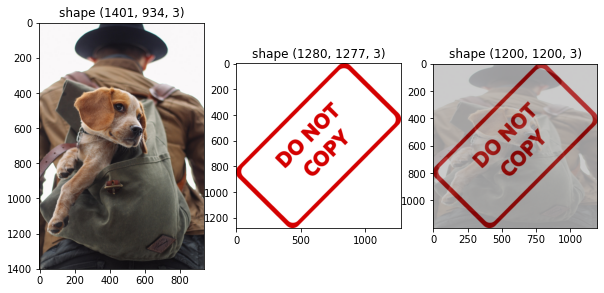

In [5]:
# Two images in different size
img1 = cv2.imread('dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,3,1)
ax.imshow(img1)
ax.set_title(f"shape {img1.shape}")

ax = fig.add_subplot(1,3,2)
ax.imshow(img2)
ax.set_title(f"shape {img2.shape}")

# Blending images of the same size
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))
blended = cv2.addWeighted(src1=img1, alpha=0.2, src2=img2,beta=0.6,gamma=0)

ax = fig.add_subplot(1,3,3)
ax.imshow(blended)
ax.set_title(f"shape {blended.shape}")

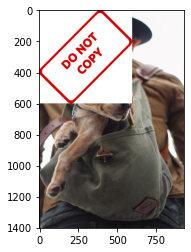

In [6]:
# OVERLAY SMALL IMAGE ON TOP OF A LARGER
# Numpy reassignment
img1 = cv2.imread('dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2,(600,600))
large_img = img1
small_img = img2
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

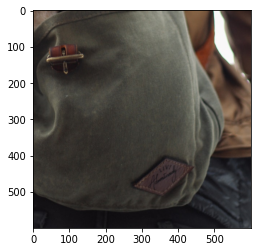

In [20]:
# BLEND TOGETHER IMAGES OF DIFFERENT SIZES
img1 = cv2.imread('dog_backpack.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(img2, (600,600))

x_offset = img1.shape[1] - 600
y_offset = img1.shape[0] - 600

rows,cols,channels = img2.shape
roi = img1[y_offset:, x_offset:]

plt.imshow(roi)

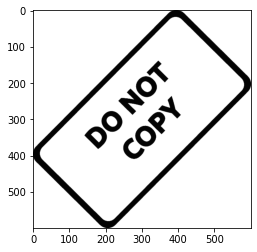

In [8]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2gray, cmap='gray')

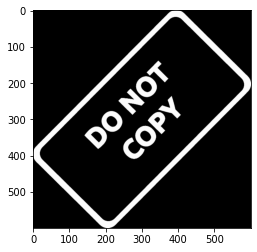

In [10]:
# Inversion of the input
mask_inv = cv2.bitwise_not(img2gray)
plt.imshow(mask_inv, cmap='gray')

In [11]:
# The mask does not have color channel, So we should add it
mask_inv.shape

(600, 600)

In [15]:
# Create a white background
white_bkg = np.full(img2.shape,255, dtype=np.uint8)
white_bkg.shape

(600, 600, 3)

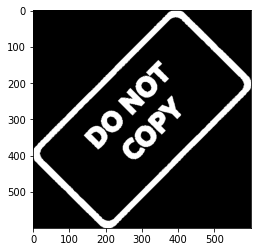

In [16]:
# Bitwise to create a mask with 3 channel
bk = cv2.bitwise_or(white_bkg, white_bkg, mask=mask_inv)
plt.imshow(bk, cmap='gray')

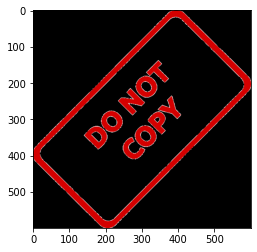

In [17]:
# Replace with original image
fg = cv2.bitwise_or(img2,img2, mask=mask_inv)
plt.imshow(fg)

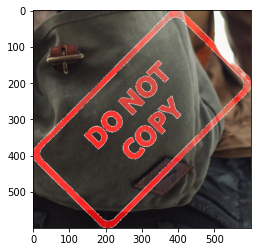

In [22]:
final_roi = cv2.bitwise_or(roi, fg)
plt.imshow(final_roi)